# EDA

#### Importing Libraries 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("D:/Rajyug/Projects/Forecasting 01/notebook/data/Dubai Residential Formatted.csv")
df.head()

,Transaction Number,Transaction Date,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,Property Sub Type,...,Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Agent,Latitude_Project,Longitude_Project
0,102-1-2023,01-02-2023 07:25,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,1,Business Bay Metro Station,Dubai Mall,Downtown Dubai,1,1,NaN,AYKON CITY 3,25.11072,55.38869
1,102-100-2023,01-02-2023 09:01,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Al Wasl,Unit,Flat,...,1,NaN,NaN,NaN,1,1,NaN,Fern,24.99426,55.16346
2,102-1000-2023,01-05-2023 13:26,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,Flat,...,1,Damac Properties,Marina Mall,Burj Al Arab,1,1,NaN,SEVEN CITY JLT,25.07052,55.14381
3,102-10000-2023,03-01-2023 16:02,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,Flat,...,1,Dubai Internet City,Marina Mall,Sports City Swimming Academy,1,1,NaN,Binghatti Corner,25.11000,55.20418
4,102-10001-2023,03-01-2023 16:09,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,Flat,...,1,Dubai Internet City,Marina Mall,Sports City Swimming Academy,1,1,NaN,Binghatti Corner,25.11000,55.20418


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44745 entries, 0 to 44744
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Transaction Number       44745 non-null  object 
 1   Transaction Date         44745 non-null  object 
 2   Transaction Type         44745 non-null  object 
 3   Transaction sub type     44745 non-null  object 
 4   Registration type        44745 non-null  object 
 5   Is Free Hold?            44745 non-null  object 
 6   Usage                    44745 non-null  object 
 7   Area                     44745 non-null  object 
 8   Property Type            44745 non-null  object 
 9   Property Sub Type        44745 non-null  object 
 10  Amount                   44745 non-null  object 
 11  Transaction Size (sq.m)  44737 non-null  float64
 12  Property Size (sq.m)     44745 non-null  float64
 13  Room(s)                  44745 non-null  object 
 14  Bedrooms              

In [10]:
df.shape

(44745, 25)

In [11]:
m=df.isna().sum()
m[m>0]

Transaction Size (sq.m)        8
Parking                     6298
Nearest Metro              15149
Nearest Mall               15161
Nearest Landmark            9457
Master Project             44638
dtype: int64

We can see that some data is missing, and we will work to fill it in.
1. Transaction Size (sq.m): Because the missing values are little, we can substitute Mean, Median, and Mode.
2. Parking: Fill in the missing data with 0 to indicate that there is no parking space for that property.
3. Master Project: Because this column is missing almost all of its data, we can consider removing it.
4. In the end, we can replace NAN with unknown because we don't know the values for the Nearest Metro, Nearest Mall, and Nearest Landmark columns.

In [12]:
mean_value = df['Transaction Size (sq.m)'].mean()
df['Transaction Size (sq.m)'] = df['Transaction Size (sq.m)'].fillna(mean_value)

In [13]:
df['Nearest Metro']=df['Nearest Metro'].fillna('unknown')
df['Nearest Mall']=df['Nearest Mall'].fillna('unknown')
df['Nearest Landmark']=df['Nearest Landmark'].fillna('unknown')

In [14]:
df['Parking']=df['Parking'].fillna(0)

In [15]:
df.drop('Master Project', axis=1, inplace=True)

In [16]:
df.isna().sum()

Transaction Number         0
Transaction Date           0
Transaction Type           0
Transaction sub type       0
Registration type          0
Is Free Hold?              0
Usage                      0
Area                       0
Property Type              0
Property Sub Type          0
Amount                     0
Transaction Size (sq.m)    0
Property Size (sq.m)       0
Room(s)                    0
Bedrooms                   0
Parking                    0
Nearest Metro              0
Nearest Mall               0
Nearest Landmark           0
No. of Buyer               0
No. of Seller              0
Agent                      0
Latitude_Project           0
Longitude_Project          0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(2)

In [18]:
df = df.drop_duplicates()

We had two duplicates and removed them.

In [19]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%m/%d/%Y %H:%M', errors='coerce')

In [20]:
df['Transaction Date'] = df['Transaction Date'].dt.strftime('%m/%d/%Y')

In [21]:
df['Amount'] = df['Amount'].str.replace(',', '').astype(int)

Modifying the Amount and Transaction Date column's data types

In [22]:
df.nunique()

Transaction Number         43440
Transaction Date              95
Transaction Type               3
Transaction sub type          31
Registration type              2
Is Free Hold?                  2
Usage                          1
Area                         110
Property Type                  2
Property Sub Type              5
Amount                     16844
Transaction Size (sq.m)    11849
Property Size (sq.m)       11649
Room(s)                        8
Bedrooms                       8
Parking                     8831
Nearest Metro                 34
Nearest Mall                   6
Nearest Landmark              14
No. of Buyer                   8
No. of Seller                 15
Agent                       1151
Latitude_Project             339
Longitude_Project            328
dtype: int64

In [24]:
Columns = df.select_dtypes(include='object').columns

for col in Columns:
    print(f"Column: {col}")
    print(df[col].unique(), "\n")

Column: Transaction Number
['102-1-2023' '102-100-2023' '102-1000-2023' ... '95-3-2023' '95-4-2023'
 '95-5-2023'] 

Column: Transaction Date
[nan '03/13/2023' '03/14/2023' '03/15/2023' '03/16/2023' '03/17/2023'
 '03/19/2023' '03/20/2023' '03/21/2023' '03/22/2023' '03/23/2023'
 '03/24/2023' '03/26/2023' '03/27/2023' '03/28/2023' '03/29/2023'
 '03/30/2023' '03/31/2023' '04/13/2023' '04/14/2023' '04/15/2023'
 '04/16/2023' '04/17/2023' '04/18/2023' '04/19/2023' '04/20/2023'
 '04/23/2023' '04/24/2023' '04/25/2023' '04/26/2023' '04/27/2023'
 '04/28/2023' '04/30/2023' '01/13/2023' '05/13/2023' '05/14/2023'
 '05/15/2023' '05/16/2023' '05/17/2023' '01/15/2023' '05/18/2023'
 '05/19/2023' '05/20/2023' '05/21/2023' '05/22/2023' '01/16/2023'
 '05/23/2023' '05/24/2023' '05/25/2023' '05/26/2023' '05/27/2023'
 '05/28/2023' '05/29/2023' '05/30/2023' '01/17/2023' '05/31/2023'
 '06/13/2023' '01/18/2023' '06/14/2023' '06/15/2023' '06/16/2023'
 '06/17/2023' '06/18/2023' '06/19/2023' '06/20/2023' '06/21/202

Here, we can observe distinct values for each column.

In [25]:
df.describe()

,Amount,Transaction Size (sq.m),Property Size (sq.m),Bedrooms,No. of Buyer,No. of Seller,Latitude_Project,Longitude_Project
count,4.474300e+04,44743.000000,44743.000000,44743.000000,44743.000000,44743.000000,44743.000000,44743.000000
mean,2.350742e+06,125.333228,126.086511,1.873500,0.978321,0.889972,25.111932,55.240244
std,4.586963e+06,96.664836,96.638364,0.963901,0.565162,0.505907,0.083373,0.085650
min,4.160000e+02,0.000000,25.000000,1.000000,0.000000,0.000000,24.309190,54.607190
25%,9.250000e+05,72.575000,72.945000,1.000000,1.000000,1.000000,25.059500,55.160530
50%,1.600000e+06,100.660000,101.500000,2.000000,1.000000,1.000000,25.107570,55.241940
75%,2.537994e+06,146.230000,146.715000,2.000000,1.000000,1.000000,25.186560,55.297470
max,4.100000e+08,3620.450000,3620.450000,9.000000,8.000000,20.000000,25.305360,55.504680


1. Transaction Date Range: The transactions occurred between 2023-01-02 and 2023-06-26.

2. Transaction Size and Property Size:
The mean transaction size is 125.33 square meters, while the mean property size is 126.09 square meters.
There is a wide range in transaction sizes, with the minimum being 0 square meters and the maximum being 3620.45 square meters. Similarly, property sizes range from 25 square meters to 3620.45 square meters.

3. Bedrooms:
The mean number of bedrooms per transaction is 1.87.
The minimum number of bedrooms is 1, while the maximum is 9.

4. Buyers and Sellers:
On average, there is 0.98 buyers per transaction and 0.89 sellers.
The maximum number of buyers in a single transaction is 8, and the maximum number of sellers is 20.

5. Location:
The latitude and longitude coordinates seem to indicate a specific geographic region, possibly a city or a state. However, without more context, it's difficult to pinpoint the exact location.

Potential Insights

. Market Activity: The data shows a range of transaction sizes, indicating diverse property types being traded. The number of buyers and sellers suggests varying levels of market activity.

. Property Size and Bedrooms: There seems to be a correlation between transaction size and property size, as well as a relationship between property size and the number of bedrooms.

. Location: The latitude and longitude data could be used to analyze spatial patterns in property transactions, such as price variations across different areas.

# Visualization

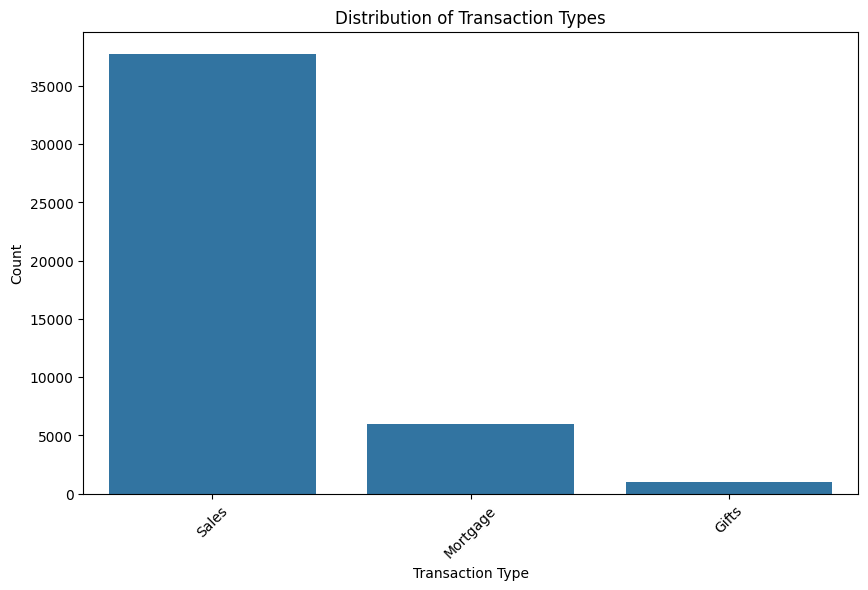

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Transaction Type')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Sales Dominate: The category "Sales" has the highest count, indicating that a majority of transactions are likely related to sales activities.

Mortgage is Significant: The "Mortgage" category has a substantial number of transactions, suggesting that mortgage-related activities are a significant part of the data.

Gifts are Less Frequent: The "Gifts" category has the lowest count, implying that gift-related transactions are less common compared to sales and mortgages.

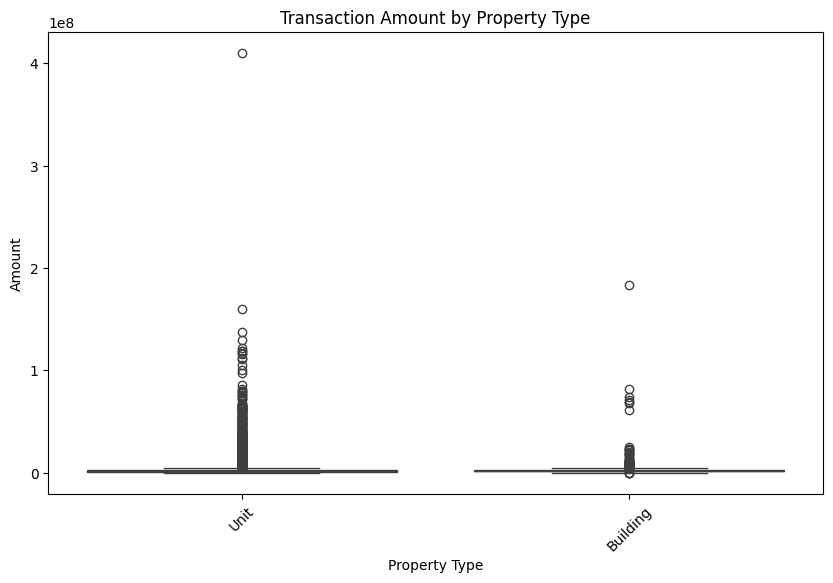

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Property Type', y='Amount')
plt.title('Transaction Amount by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

Unit vs. Building:
"Building" transactions are generally higher in value than "Unit" transactions.

The wider range and more outliers for "Unit" suggest potential variations in unit sizes, locations, or amenities, leading to a wider price spectrum.

Outliers:
Outliers could represent luxury properties, unique locations, or special circumstances.

Further investigation is needed to understand the factors contributing to these outliers.

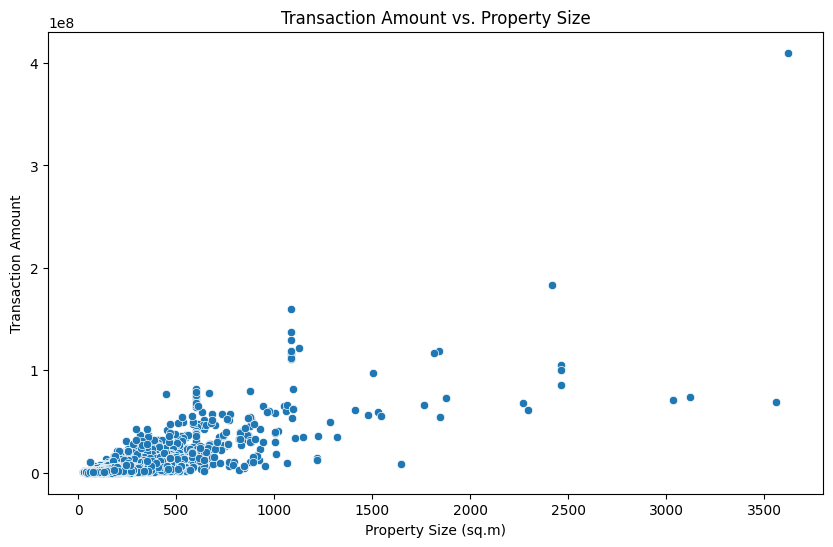

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Property Size (sq.m)', y='Amount')
plt.title('Transaction Amount vs. Property Size')
plt.xlabel('Property Size (sq.m)')
plt.ylabel('Transaction Amount')
plt.show()

The scatter plot titled "Transaction Amount vs. Property Size" shows a positive correlation between the size of a property in square meters and the transaction amount. This means that generally, larger properties tend to have higher transaction amounts. However, there are a few outliers, which are properties with very large sizes but relatively low transaction amounts. This could be due to various factors such as location, age of the property, or other amenities.

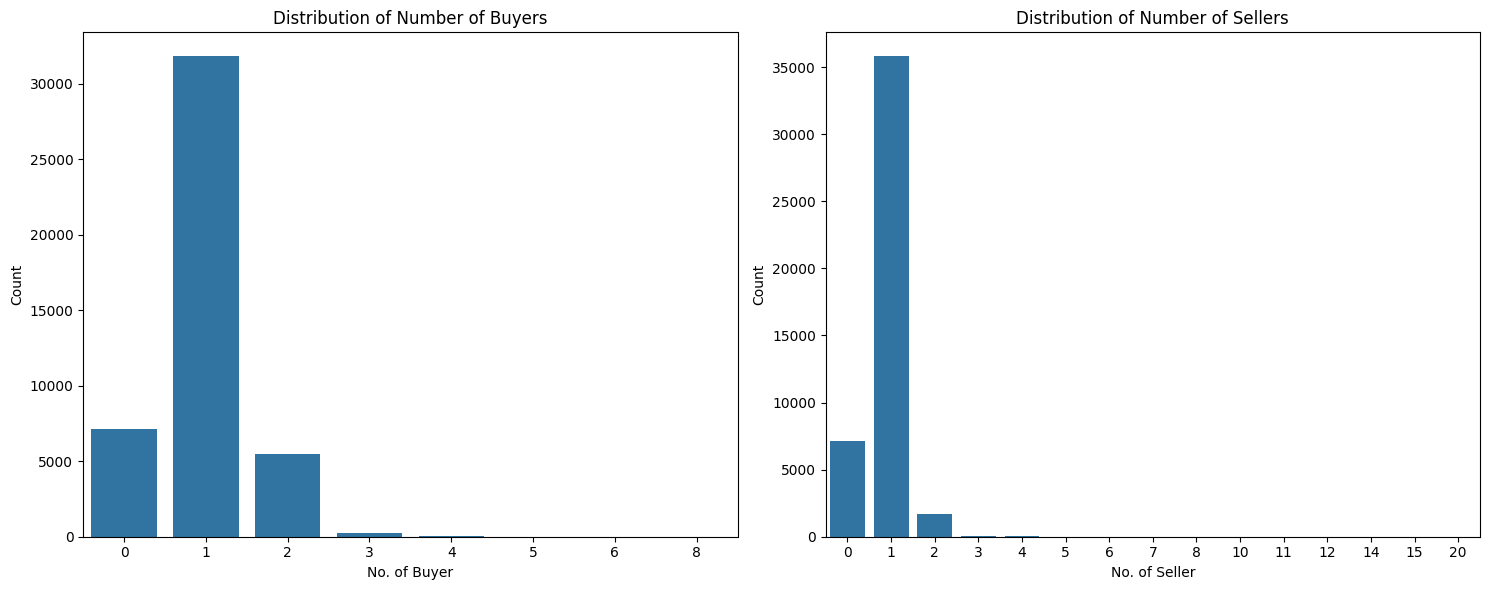

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='No. of Buyer', ax=axes[0])
axes[0].set_title('Distribution of Number of Buyers')
axes[0].set_xlabel('No. of Buyer')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='No. of Seller', ax=axes[1])
axes[1].set_title('Distribution of Number of Sellers')
axes[1].set_xlabel('No. of Seller')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


This distribution could suggest a market with a large number of small buyers and a smaller number of larger buyers.
Similarly, there might be a larger number of smaller sellers and a smaller number of larger sellers.
The asymmetry in the distributions could indicate differences in market power or scale between buyers and sellers.

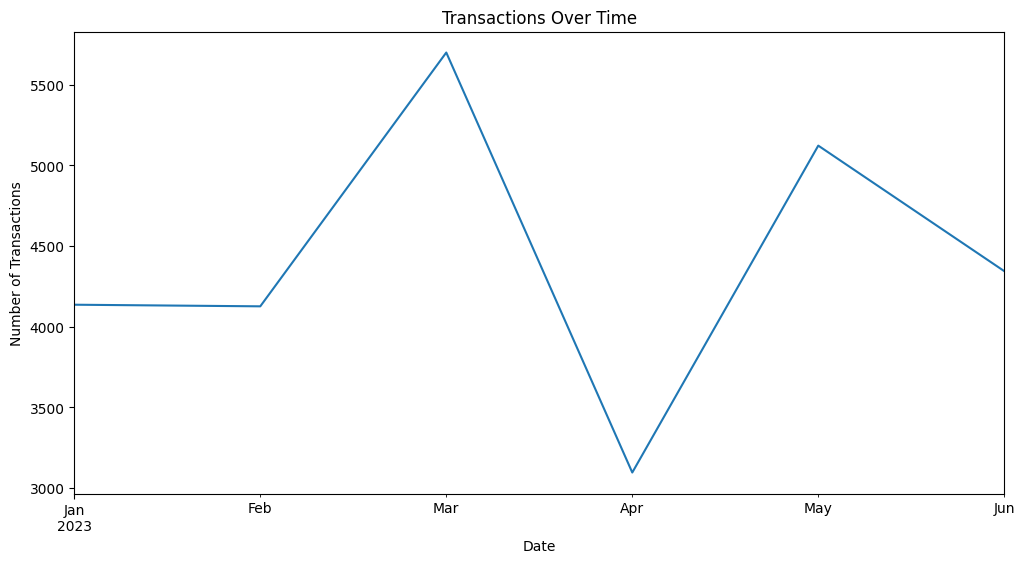

In [33]:
# Ensure 'Transaction Date' is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

plt.figure(figsize=(12, 6))
df.groupby(df['Transaction Date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


Peak in March: The highest number of transactions occurred in March 2023, with a value of approximately 5700.

Drop in April: There was a significant decrease in transactions in April, falling to around 3100.

Recovery in May and June: The number of transactions rebounded in May, reaching over 5100. It then maintained a similar level in June, hovering around 4400.